<a href="https://colab.research.google.com/github/sayeemabdullah/Twitter-User-Gender-Prediction/blob/main/TwitterUserGenderPredictionUsingRetweetCount%26TweetCount%26FavoritedTweet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [70]:
# https://www.kaggle.com/crowdflower/twitter-user-gender-classification

# unitid: a unique id for user
# _golden: whether the user was included in the gold standard for the model; TRUE or FALSE
# unitstate: state of the observation; one of finalized (for contributor-judged) or golden (for gold standard observations)
# trustedjudgments: number of trusted judgments (int); always 3 for non-golden, and what may be a unique id for gold standard observations
# lastjudgment_at: date and time of last contributor judgment; blank for gold standard observations
# gender: one of male, female, or brand (for non-human profiles)
# gender:confidence: a float representing confidence in the provided gender
# profile_yn: "no" here seems to mean that the profile was meant to be part of the dataset but was not available when contributors went to judge it
# profile_yn:confidence: confidence in the existence/non-existence of the profile
# created: date and time when the profile was created
# description: the user's profile description
# fav_number: number of tweets the user has favorited
# gender_gold: if the profile is golden, what is the gender?
# link_color: the link color on the profile, as a hex value
# name: the user's name
# profileyngold: whether the profile y/n value is golden
# profileimage: a link to the profile image
# retweet_count: number of times the user has retweeted (or possibly, been retweeted)
# sidebar_color: color of the profile sidebar, as a hex value
# text: text of a random one of the user's tweets
# tweet_coord: if the user has location turned on, the coordinates as a string with the format "[latitude, longitude]"
# tweet_count: number of tweets that the user has posted
# tweet_created: when the random tweet (in the text column) was created
# tweet_id: the tweet id of the random tweet
# tweet_location: location of the tweet; seems to not be particularly normalized
# user_timezone: the timezone of the user

In [71]:
import pandas as pd

url = 'https://raw.githubusercontent.com/sayeemabdullah/Twitter-User-Gender-Prediction/main/Dataset/gender-classifier-DFE-791531.csv'

df = pd.read_csv(url,encoding = "ISO-8859-1")

print(df.columns)

df.drop(['_unit_id', '_golden', '_unit_state', '_trusted_judgments',
       '_last_judgment_at','gender:confidence', 'profile_yn',
       'profile_yn:confidence','gender_gold','profile_yn_gold', 'profileimage',
       'tweet_id', 'tweet_location', 'user_timezone'], axis='columns', inplace=True)

print(df.columns)

Index(['_unit_id', '_golden', '_unit_state', '_trusted_judgments',
       '_last_judgment_at', 'gender', 'gender:confidence', 'profile_yn',
       'profile_yn:confidence', 'created', 'description', 'fav_number',
       'gender_gold', 'link_color', 'name', 'profile_yn_gold', 'profileimage',
       'retweet_count', 'sidebar_color', 'text', 'tweet_coord', 'tweet_count',
       'tweet_created', 'tweet_id', 'tweet_location', 'user_timezone'],
      dtype='object')
Index(['gender', 'created', 'description', 'fav_number', 'link_color', 'name',
       'retweet_count', 'sidebar_color', 'text', 'tweet_coord', 'tweet_count',
       'tweet_created'],
      dtype='object')


In [72]:
def findGenderStatus():
  male = 0
  female = 0
  brand = 0
  other = 0

  for i in range(len(df.gender)):
    if df.gender[i] == "male":
      male = male + 1
    elif df.gender[i] == "female":
      female = female + 1
    elif df.gender[i] == "brand":
      brand = brand + 1
    else:
      other = other + 1

  print("Male: " , male)
  print("Female: " ,female)
  print("Brand: " ,brand)
  print("Other: " ,other)


  print(df.gender)

findGenderStatus()

Male:  6194
Female:  6700
Brand:  5942
Other:  1214
0          male
1          male
2          male
3          male
4        female
          ...  
20045    female
20046      male
20047      male
20048    female
20049    female
Name: gender, Length: 20050, dtype: object


In [73]:
df.drop(df.index[(df['gender'] != 'male') & (df['gender'] != 'female')  & (df['gender'] != 'brand')], inplace = True)
df.reset_index(drop=True, inplace=True)

findGenderStatus()

Male:  6194
Female:  6700
Brand:  5942
Other:  0
0          male
1          male
2          male
3          male
4        female
          ...  
18831    female
18832      male
18833      male
18834    female
18835    female
Name: gender, Length: 18836, dtype: object


In [74]:
target_list = df['gender'].tolist()

for i in range(len(df.gender)):
  if df.gender[i] == "male":
    target_list[i] = 1
  elif df.gender[i] == "female":
    target_list[i] = 2
  else:
    target_list[i] = 3

df['gender_Code'] = target_list

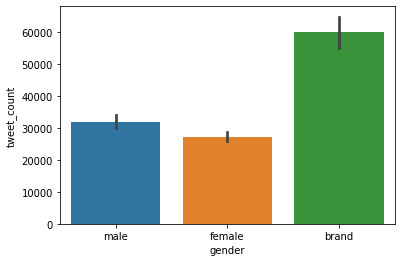

In [75]:
import seaborn as sb
sb.barplot (x = 'gender', y = 'tweet_count',data = df)

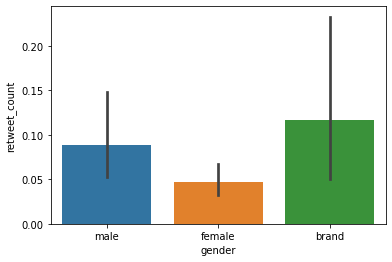

In [76]:
sb.barplot (x = 'gender', y = 'retweet_count',data = df)

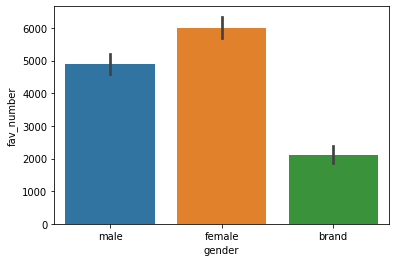

In [77]:
sb.barplot (x = 'gender', y = 'fav_number',data = df)

In [78]:
df.drop(['gender'], axis='columns', inplace=True)

print(df.columns)


df.info()

Index(['created', 'description', 'fav_number', 'link_color', 'name',
       'retweet_count', 'sidebar_color', 'text', 'tweet_coord', 'tweet_count',
       'tweet_created', 'gender_Code'],
      dtype='object')
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18836 entries, 0 to 18835
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   created        18836 non-null  object
 1   description    15522 non-null  object
 2   fav_number     18836 non-null  int64 
 3   link_color     18836 non-null  object
 4   name           18836 non-null  object
 5   retweet_count  18836 non-null  int64 
 6   sidebar_color  18836 non-null  object
 7   text           18836 non-null  object
 8   tweet_coord    157 non-null    object
 9   tweet_count    18836 non-null  int64 
 10  tweet_created  18836 non-null  object
 11  gender_Code    18836 non-null  int64 
dtypes: int64(4), object(8)
memory usage: 1.7+ MB


In [79]:
df.drop(['created', 'description','link_color', 'name',
       'sidebar_color', 'text', 'tweet_coord',
       'tweet_created'], axis='columns', inplace=True)

print(df.columns)

Index(['fav_number', 'retweet_count', 'tweet_count', 'gender_Code'], dtype='object')


In [80]:
x = df.drop('gender_Code',axis=1).values
y = df['gender_Code'].values

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

from sklearn.tree import DecisionTreeClassifier 


clf = DecisionTreeClassifier()
clf = clf.fit(x_train,y_train)
y_pred = clf.predict(x_test)

from sklearn import metrics
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.45284020527340296


In [81]:
x = df.drop('gender_Code',axis=1).values
y = df['gender_Code'].values

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)


from sklearn.ensemble import RandomForestClassifier

clf=RandomForestClassifier(n_estimators=50)
clf.fit(x_train,y_train)
y_pred=clf.predict(x_test)

from sklearn import metrics
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.4772606618297646


In [82]:
x = df.drop('gender_Code',axis=1).values
y = df['gender_Code'].values

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)


from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(x_train, y_train)
y_pred = knn.predict(x_test)

from sklearn import metrics
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.4501858078216245
